# Assignment 4

## Eric Schmidt

## DATA 612: Data Mining

## Dr. AbdelRahman

In [1]:
import pandas as pd
import numpy as np

## 1. Merge other data to your selected data set.

- Selected data set is the Teams.csv file containing all baseball team names and corresponding statistics.
- Other data to be merged are the following:
    - People.csv
    - AllsarsFull.csv
    - Salaries.csv

In [2]:
teams_df = pd.read_csv('https://raw.githubusercontent.com/buckioh1/data_612/master/baseballdatabank-master/core/Teams.csv')
players_df = pd.read_csv('https://raw.githubusercontent.com/buckioh1/data_612/master/baseballdatabank-master/core/People.csv')
all_stars_df = pd.read_csv('https://raw.githubusercontent.com/buckioh1/data_612/master/baseballdatabank-master/core/AllstarFull.csv')
salaries_df = pd.read_csv('https://raw.githubusercontent.com/buckioh1/data_612/master/baseballdatabank-master/core/Salaries.csv')

In [3]:
print(teams_df.columns, '/n',
      players_df.columns, '/n',
      all_stars_df.columns, '/n',
      salaries_df.columns)

Index(['yearID', 'lgID', 'teamID', 'franchID', 'divID', 'Rank', 'G', 'Ghome',
       'W', 'L', 'DivWin', 'WCWin', 'LgWin', 'WSWin', 'R', 'AB', 'H', '2B',
       '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP',
       'name', 'park', 'attendance', 'BPF', 'PPF', 'teamIDBR',
       'teamIDlahman45', 'teamIDretro'],
      dtype='object') /n Index(['playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry',
       'birthState', 'birthCity', 'deathYear', 'deathMonth', 'deathDay',
       'deathCountry', 'deathState', 'deathCity', 'nameFirst', 'nameLast',
       'nameGiven', 'weight', 'height', 'bats', 'throws', 'debut', 'finalGame',
       'retroID', 'bbrefID'],
      dtype='object') /n Index(['playerID', 'yearID', 'gameNum', 'gameID', 'teamID', 'lgID', 'GP',
       'startingPos'],
      dtype='object') /n Index(['yearID', 'teamID', 'lgID', 'playerID', 'salary'], dtype='object')


### Merging Teams.csv with Allstars.csv on `yearID` and `teamID`.

In [4]:
all_stars_teams_df = all_stars_df[['playerID', 'yearID', 'teamID', 'lgID']].merge(teams_df[['yearID', 'teamID', 'name', 'park']],
                                      left_on= ['yearID', 'teamID'],
                                      right_on= ['yearID', 'teamID'])
all_stars_teams_df

,playerID,yearID,teamID,lgID,name,park
0,gomezle01,1933.0,NYA,AL,New York Yankees,Yankee Stadium I
1,gehrilo01,1933.0,NYA,AL,New York Yankees,Yankee Stadium I
2,ruthba01,1933.0,NYA,AL,New York Yankees,Yankee Stadium I
3,dickebi01,1933.0,NYA,AL,New York Yankees,Yankee Stadium I
4,lazzeto01,1933.0,NYA,AL,New York Yankees,Yankee Stadium I
...,...,...,...,...,...,...
5231,grayso01,2019.0,CIN,NL,Cincinnati Reds,Great American Ball Park
5232,dejonpa01,2019.0,SLN,NL,St. Louis Cardinals,Busch Stadium III
5233,realmjt01,2019.0,PHI,NL,Philadelphia Phillies,Citizens Bank Park
5234,smithwi04,2019.0,SFN,NL,San Francisco Giants,Oracle Park


### Merging previous dataframe with Salaries.csv on `yearID` and `playerID`.

In [5]:
all_stars_salaries_df = all_stars_teams_df.merge(salaries_df[['yearID', 'playerID', 'salary']],
                                             left_on= ['yearID', 'playerID'],
                                             right_on= ['yearID', 'playerID'])

all_stars_salaries_df

,playerID,yearID,teamID,lgID,name,park,salary
0,morrija02,1985.0,DET,AL,Detroit Tigers,Tiger Stadium,885000
1,whitalo01,1985.0,DET,AL,Detroit Tigers,Tiger Stadium,670000
2,hernawi01,1985.0,DET,AL,Detroit Tigers,Tiger Stadium,660000
3,parrila02,1985.0,DET,AL,Detroit Tigers,Tiger Stadium,766667
4,petryda01,1985.0,DET,AL,Detroit Tigers,Tiger Stadium,875000
...,...,...,...,...,...,...,...
2069,seageco01,2016.0,LAN,NL,Los Angeles Dodgers,Dodger Stadium,510000
2070,lucrojo01,2016.0,MIL,NL,Milwaukee Brewers,Miller Park,4100000
2071,martest01,2016.0,PIT,NL,Pittsburgh Pirates,PNC Park,3333333
2072,melanma01,2016.0,PIT,NL,Pittsburgh Pirates,PNC Park,9650000


### Merging previous dataframe with Players.csv on `playerID`.

In [6]:
salaries_names_df = all_stars_salaries_df.merge(players_df[['playerID', 'birthYear', 'birthCountry', 'birthState', 'birthCity', 'nameFirst', 'nameLast']],
                                               left_on= ['playerID'],
                                               right_on= ['playerID'])

salaries_names_df = salaries_names_df.drop(columns='playerID')
salaries_names_df

,yearID,teamID,lgID,name,park,salary,birthYear,birthCountry,birthState,birthCity,nameFirst,nameLast
0,1985.0,DET,AL,Detroit Tigers,Tiger Stadium,885000,1955.0,USA,MN,St. Paul,Jack,Morris
1,1987.0,DET,AL,Detroit Tigers,Tiger Stadium,1850000,1955.0,USA,MN,St. Paul,Jack,Morris
2,1991.0,MIN,AL,Minnesota Twins,Hubert H Humphrey Metrodome,3700000,1955.0,USA,MN,St. Paul,Jack,Morris
3,1985.0,DET,AL,Detroit Tigers,Tiger Stadium,670000,1957.0,USA,NY,Brooklyn,Lou,Whitaker
4,1986.0,DET,AL,Detroit Tigers,Tiger Stadium,670000,1957.0,USA,NY,Brooklyn,Lou,Whitaker
...,...,...,...,...,...,...,...,...,...,...,...,...
2069,2016.0,NYN,NL,New York Mets,Citi Field,535375,1992.0,USA,TX,Mansfield,Noah,Syndergaard
2070,2016.0,PHI,NL,Philadelphia Phillies,Citizens Bank Park,528000,1991.0,Venezuela,Anzoategui,San Jose,Odubel,Herrera
2071,2016.0,LAN,NL,Los Angeles Dodgers,Dodger Stadium,10650000,1987.0,Curacao,NaN,Willemstad,Kenley,Jansen
2072,2016.0,LAN,NL,Los Angeles Dodgers,Dodger Stadium,510000,1994.0,USA,NC,Charlotte,Corey,Seager


## 2. Identify the missing values on your data set. Count the missing values on your data set and then clean your data set from the missing values.

### Counting the missing values using the `count()` function.

In [7]:
# Calculate the missing values.

num_rows = salaries_names_df.shape[0]

num_missing = num_rows - salaries_names_df.count()
num_missing

yearID            0
teamID            0
lgID              0
name              0
park              0
salary            0
birthYear         0
birthCountry      0
birthState      114
birthCity         0
nameFirst         0
nameLast          0
dtype: int64

In [8]:
salaries_names_df = salaries_names_df.fillna('International')

In [9]:
# Confirm no missing values.

salaries_names_df.count()

yearID          2074
teamID          2074
lgID            2074
name            2074
park            2074
salary          2074
birthYear       2074
birthCountry    2074
birthState      2074
birthCity       2074
nameFirst       2074
nameLast        2074
dtype: int64

In [10]:
# Confirm 'International' fillna() function worked properly by viewing all Countries with 'International' as state.

salaries_names_df[salaries_names_df['birthState'] == 'International'].value_counts(['birthCountry'])

birthCountry
P.R.            101
Curacao           7
Cuba              2
Viet Nam          2
Aruba             1
Taiwan            1
dtype: int64

### Plot the highests salaries for All Stars by year.

<AxesSubplot:xlabel='yearID'>

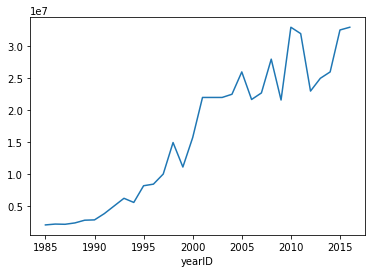

In [11]:
highest_salary = salaries_names_df.groupby(['yearID'])['salary'].max()
highest_salary.plot()

## 3. Post your work on github.

Find the .ipynb located here:
https://github.com/buckioh1/Franklin/tree/main/Assignment%204

## 4. Add a README.

README file located here:
https://github.com/buckioh1/Franklin/blob/main/Assignment%204/README.md